In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_csv("insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [46]:
df.shape

(1338, 7)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [49]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

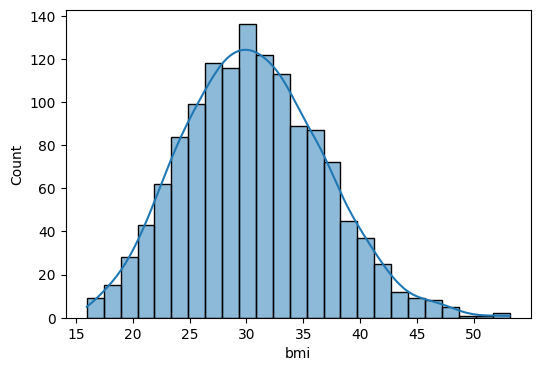

In [51]:
numeric_columns = ['age', 'bmi', 'children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)

<Axes: xlabel='children', ylabel='count'>

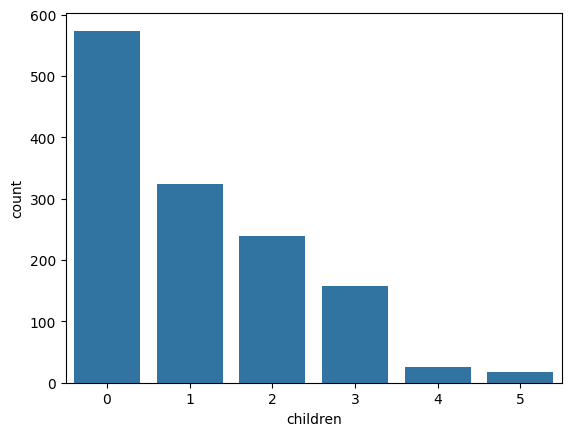

In [52]:
sns.countplot(x=df["children"])

<Axes: xlabel='sex', ylabel='count'>

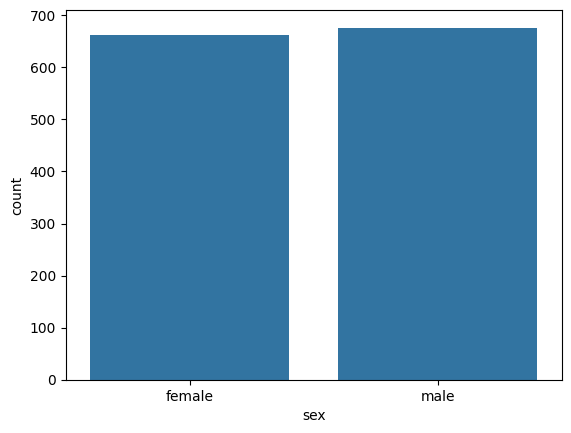

In [53]:
sns.countplot(x=df["sex"])

<Axes: xlabel='smoker', ylabel='count'>

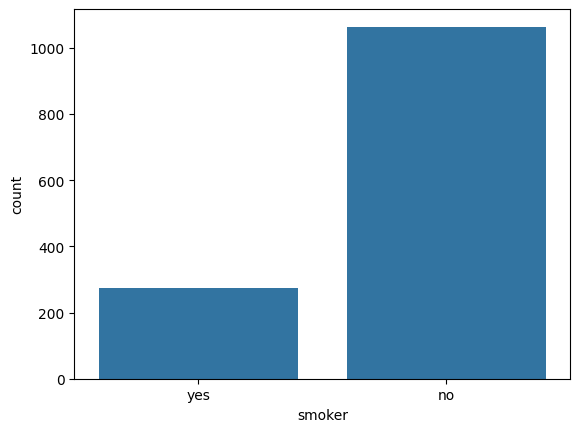

In [54]:
sns.countplot(x=df["smoker"])

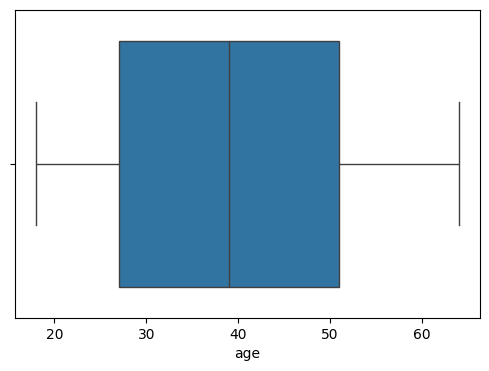

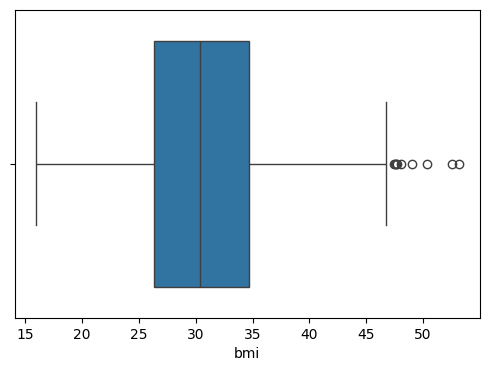

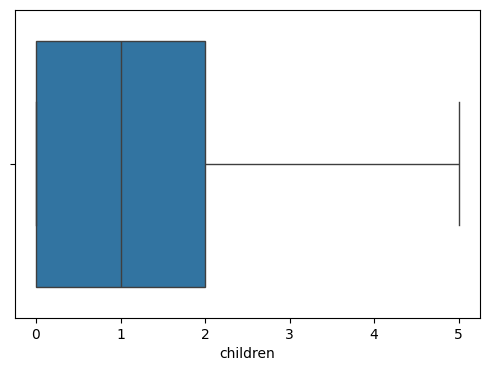

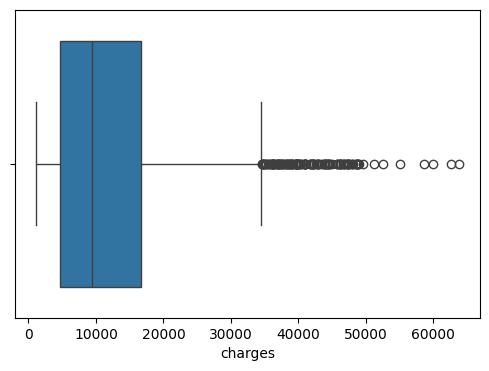

In [55]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

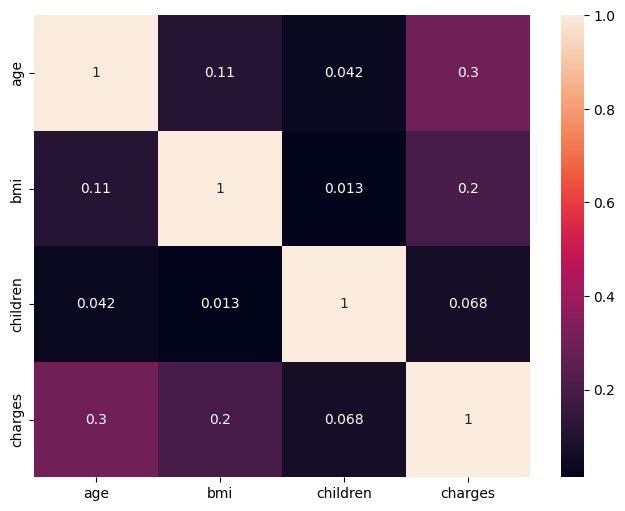

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [57]:
df_cleaned = df.copy()

In [58]:
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [59]:
df_cleaned.drop_duplicates(inplace=True)

In [60]:
df_cleaned.shape

(1337, 7)

In [61]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df_cleaned.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [63]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [64]:
df_cleaned["sex"] = df_cleaned['sex'].map({'male':0 ,"female":1})
df_cleaned

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [65]:
df_cleaned["smoker"] =df["smoker"].map({"yes":1,"no":0})
df_cleaned

age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1337 rows x 7 columns]

In [66]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker' : 'is_smoker'
},inplace=True)
df_cleaned

age  is_female     bmi  children  is_smoker     region      charges
0      19          1  27.900         0          1  southwest  16884.92400
1      18          0  33.770         1          0  southeast   1725.55230
2      28          0  33.000         3          0  southeast   4449.46200
3      33          0  22.705         0          0  northwest  21984.47061
4      32          0  28.880         0          0  northwest   3866.85520
...   ...        ...     ...       ...        ...        ...          ...
1333   50          0  30.970         3          0  northwest  10600.54830
1334   18          1  31.920         0          0  northeast   2205.98080
1335   18          1  36.850         0          0  southeast   1629.83350
1336   21          1  25.800         0          0  southwest   2007.94500
1337   61          1  29.070         0          1  northwest  29141.36030

[1337 rows x 7 columns]

In [67]:
df_cleaned =pd.get_dummies(df_cleaned , columns=['region'] ,drop_first=True)


In [68]:
df_cleaned.head()

age  is_female     bmi  children  is_smoker      charges  region_northwest  \
0   19          1  27.900         0          1  16884.92400             False   
1   18          0  33.770         1          0   1725.55230             False   
2   28          0  33.000         3          0   4449.46200             False   
3   33          0  22.705         0          0  21984.47061              True   
4   32          0  28.880         0          0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [69]:
df_cleaned=df_cleaned.astype(int)

In [70]:
df_cleaned.head()

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0   19          1   27         0          1    16884                 0   
1   18          0   33         1          0     1725                 0   
2   28          0   33         3          0     4449                 0   
3   33          0   22         0          0    21984                 1   
4   32          0   28         0          0     3866                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

<Axes: xlabel='bmi', ylabel='Count'>

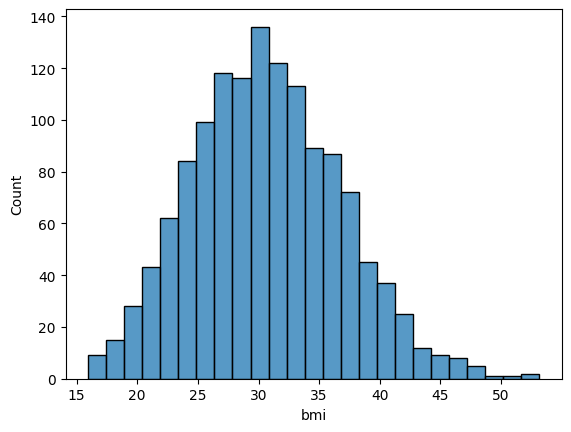

In [71]:
sns.histplot(df['bmi'])

In [72]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','normal','overweight','obese']
)
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest bmi_category  
0                    0                 1   overweight  
1                    1                 0        obese  
2                    1                 0        obese  
3                    0                 0       normal  
4                    0                 0   overweight  
...                ...               ...          ...  
1333                 0                 0        obese  
1334                 0                 0        obese  
1335                 1                 0        obese  
1336                 0                 1   overweight  
1337                 0                 0   overweight  

[1337 rows x 10 columns]

In [73]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'],drop_first=True)

In [74]:
df_cleaned = df_cleaned.astype(int)

In [75]:
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest  bmi_category_normal  \
0                    0                 1                    0   
1                    1                 0                    0   
2                    1                 0                    0   
3                    0                 0                    1   
4                    0                 0                    0   
...                ...               ...                  ...   
1333                 0                 0                    0   
1334                 0                 0                    0   
1335                 1                 0                    0   
1336                 0                 1                    0   
1337                 0                 0                    0   

      bmi_category_overweight  bmi_category_obese  
0                           1                   0  
1                           0                   1  
2                           0                   1  
3                           0                   0  
4                           1                   0  
...                       ...                 ...  
1333                        0                   1  
1334                        0                   1  
1335                        0                   1  
1336                        1                   0  
1337                        1                   0  

[1337 rows x 12 columns]

In [76]:
df_cleaned.columns


Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler
cols = ["age","bmi","children"]
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [92]:
df_cleaned.head()

age  is_female       bmi  children  is_smoker  charges  \
0 -1.440418          1 -0.517949 -0.909234          1    16884   
1 -1.511647          0  0.462463 -0.079442          0     1725   
2 -0.799350          0  0.462463  1.580143          0     4449   
3 -0.443201          0 -1.334960 -0.909234          0    21984   
4 -0.514431          0 -0.354547 -0.909234          0     3866   

   region_northwest  region_southeast  region_southwest  bmi_category_normal  \
0                 0                 0                 1                    0   
1                 0                 1                 0                    0   
2                 0                 1                 0                    0   
3                 1                 0                 0                    1   
4                 1                 0                 0                    0   

   bmi_category_overweight  bmi_category_obese  charges_bin  
0                        1                   0            3  
1                        0                   1            0  
2                        0                   1            0  
3                        0                   0            3  
4                        1                   0            0

In [93]:
from scipy.stats import pearsonr
select_feature =[
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']

# Calculate Pearson correlation of each feature with 'charges'
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in select_feature if feature != 'charges'
}

# Display correlations
correlations_df = pd.DataFrame(list(correlations.items()),columns=['Feature',"Pearson Correlation"])
correlations_df .sort_values(by="Pearson Correlation",ascending=False)

Feature  Pearson Correlation
4                 is_smoker             0.787234
0                       age             0.298309
10       bmi_category_obese             0.200348
2                       bmi             0.196236
6          region_southeast             0.073577
3                  children             0.067390
5          region_northwest            -0.038695
7          region_southwest            -0.043637
1                 is_female            -0.058046
8       bmi_category_normal            -0.104042
9   bmi_category_overweight            -0.120601

In [94]:
cat_fetures =[
   'is_female','is_smoker', 
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']

In [100]:
from scipy.stats import chi2_contingency
alpha =0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned["charges"],q=4,labels=False)
chi2_result = {}

for col in cat_fetures:
   
        contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency)
        decision = "Reject null keep feature" if p_val < alpha else 'Accepted null Drop Feature'
        chi2_result[col] = {
            "chi2_stat": chi2_stat,
            "p_value": p_val,
            "decision": decision
        }
chi2_df = pd.DataFrame(chi2_result).T
chi2_df =chi2_df.sort_values(by='p_value')
chi2_df


chi2_stat   p_value                    decision
is_smoker                848.219178       0.0    Reject null keep feature
region_southeast          15.998167  0.001135    Reject null keep feature
is_female                 10.258784   0.01649    Reject null keep feature
bmi_category_obese         8.515711  0.036473    Reject null keep feature
region_southwest           5.091893  0.165191  Accepted null Drop Feature
bmi_category_overweight     4.25149  0.235557  Accepted null Drop Feature
bmi_category_normal        3.708088   0.29476  Accepted null Drop Feature
region_northwest            1.13424  0.768815  Accepted null Drop Feature

In [96]:
final_df = df_cleaned[['age','is_female','bmi','children','is_smoker','charges','region_southwest','bmi_category_obese']]
final_df

age  is_female       bmi  children  is_smoker  charges  \
0    -1.440418          1 -0.517949 -0.909234          1    16884   
1    -1.511647          0  0.462463 -0.079442          0     1725   
2    -0.799350          0  0.462463  1.580143          0     4449   
3    -0.443201          0 -1.334960 -0.909234          0    21984   
4    -0.514431          0 -0.354547 -0.909234          0     3866   
...        ...        ...       ...       ...        ...      ...   
1333  0.767704          0 -0.027743  1.580143          0    10600   
1334 -1.511647          1  0.135659 -0.909234          0     2205   
1335 -1.511647          1  0.952670 -0.909234          0     1629   
1336 -1.297958          1 -0.844753 -0.909234          0     2007   
1337  1.551231          1 -0.191145 -0.909234          1    29141   

      region_southwest  bmi_category_obese  
0                    1                   0  
1                    0                   1  
2                    0                   1  
3                    0                   0  
4                    0                   0  
...                ...                 ...  
1333                 0                   1  
1334                 0                   1  
1335                 0                   1  
1336                 1                   0  
1337                 0                   0  

[1337 rows x 8 columns]

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature and target
X = final_df.drop('charges', axis=1)
y = final_df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred
# Evaluate



array([ 7934.00229551,  5053.70854577, 14623.01922267, 32443.01761869,
        9195.59537053, 13596.88786711, 30152.83964195,  1080.25854939,
       11473.90185413, 10040.72616451, 10914.55006878, 32136.87411354,
       31535.92599591, 15798.93739434, 10265.99036473,  8140.42337179,
        5137.69980088, 32697.89987278,  2993.46293386,  4141.69823204,
        5042.0392142 , 28770.53286026, 14084.62194898, 29150.75116959,
       31487.77376493,  6364.59978555, 35217.04108495, 37524.51130427,
       12554.79070996, 14255.70250508,  7616.77491359, 13309.27853906,
         830.95146597, 11008.53668157, 37712.27511091, 13016.93102728,
        3347.56911286,  4636.66885403, 31806.67512074,  8293.87675686,
        6036.82112731, 30462.92111003, 35515.14427463, 13144.59753614,
        8085.76910225,  2657.70137483,  5123.12423524,  7262.17023062,
        3561.54828055, 10691.95317493,  8108.3975878 , 10446.09652468,
       30339.99278491,  4968.10010701, 11320.44846906, 11772.00504381,
      

In [98]:
r2 = r2_score(y_test, y_pred)
r2

0.8042246523654485

In [99]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 =1-((1-r2) *(n-1)/ (n-p-1))
adjusted_r2



0.7989537776214413